# Imports

In [2]:
import pandas as pd
import numpy as np
import os,  sys

# Find path to .py files
# sys.path.append('/Users/benjaminwong/JupyterNotebooks/masters_pfti/notebooks/python/')

# Inputs

In [3]:
ROOT = '../data/minesense/'
assays = pd.read_csv(ROOT + 'assays.csv', header=7, index_col=0)
assays

,ME-ICP61,ME-ICP61.1,ME-ICP61.2,ME-ICP61.3,ME-ICP61.4,ME-ICP61.5,ME-ICP61.6,ME-ICP61.7,ME-ICP61.8,ME-ICP61.9,...,ME-ICP61.28,ME-ICP61.29,ME-ICP61.30,ME-ICP61.31,ME-ICP61.32,ME-ICP61.33,Cu-OG62,Cu-AA05,Cu-AA17,Au-ICP21
SAMPLE,Ag,Al,As,Ba,Be,Bi,Ca,Cd,Co,Cr,...,Ti,Tl,U,V,W,Zn,Cu,Cu,Cu,Au
DESCRIPTION,ppm,%,ppm,ppm,ppm,ppm,%,ppm,ppm,ppm,...,%,ppm,ppm,ppm,ppm,ppm,%,%,%,ppm
101496,1.9,0.29,9,10,<0.5,5,19.10,<0.5,6,34,...,0.02,<10,<10,19,10,79,NaN,0.016,0.175,0.116
101497,3.1,0.24,16,10,<0.5,27,18.65,0.5,11,47,...,0.01,<10,<10,17,50,138,NaN,0.014,0.035,0.406
101498A,6.7,0.34,13,10,<0.5,6,15.95,<0.5,13,45,...,0.02,<10,<10,23,10,89,1.350,0.069,0.874,0.564
101498B,6.5,0.33,14,10,<0.5,<2,15.85,0.5,13,40,...,0.02,<10,<10,23,10,86,1.355,0.069,0.912,0.555
101499,5.9,0.22,15,10,<0.5,5,11.00,0.5,23,63,...,0.02,<10,<10,57,10,125,1.340,0.120,0.856,1.400
101500,3.1,0.32,13,10,<0.5,5,18.60,<0.5,8,50,...,0.02,<10,<10,19,20,88,NaN,0.041,0.333,0.280
101151,2.2,0.24,12,10,<0.5,10,19.10,<0.5,6,37,...,0.02,<10,<10,17,20,120,NaN,0.016,0.082,0.142
101152,5.9,0.25,26,10,<0.5,5,12.45,0.6,19,48,...,0.02,<10,<10,42,10,114,1.290,0.064,0.825,0.993


In [4]:
peaks = pd.read_csv(ROOT + 'atm_peaks.csv')
peaks.count()

DATA_SOURCE_CODE    129
RUN_ID              129
RUN_REF_NO          129
Sample              129
Unnamed: 4            0
                   ... 
SPECTRUM_MAX        129
KVFB_MAX            129
UAFB_MAX            129
HGL1_RED              0
HGL1_DCR              0
Length: 94, dtype: int64

# Clean

## Assays

In [5]:
# Fix names
names = {}
SAMPLE = 'SAMPLE'
DESC = 'DESCRIPTION'

if SAMPLE in list(assays.index) and DESC in list(assays.index):
    for col in list(assays.columns):
        names[col] = f'{col}_{assays.loc[SAMPLE, col]}_{assays.loc[DESC, col]}'

    assays = assays.rename(columns=names)
    assays = assays.drop([SAMPLE, DESC], axis=0)
    
assays

,ME-ICP61_Ag_ppm,ME-ICP61.1_Al_%,ME-ICP61.2_As_ppm,ME-ICP61.3_Ba_ppm,ME-ICP61.4_Be_ppm,ME-ICP61.5_Bi_ppm,ME-ICP61.6_Ca_%,ME-ICP61.7_Cd_ppm,ME-ICP61.8_Co_ppm,ME-ICP61.9_Cr_ppm,...,ME-ICP61.28_Ti_%,ME-ICP61.29_Tl_ppm,ME-ICP61.30_U_ppm,ME-ICP61.31_V_ppm,ME-ICP61.32_W_ppm,ME-ICP61.33_Zn_ppm,Cu-OG62_Cu_%,Cu-AA05_Cu_%,Cu-AA17_Cu_%,Au-ICP21_Au_ppm
101496,1.9,0.29,9,10,<0.5,5,19.10,<0.5,6,34,...,0.02,<10,<10,19,10,79,NaN,0.016,0.175,0.116
101497,3.1,0.24,16,10,<0.5,27,18.65,0.5,11,47,...,0.01,<10,<10,17,50,138,NaN,0.014,0.035,0.406
101498A,6.7,0.34,13,10,<0.5,6,15.95,<0.5,13,45,...,0.02,<10,<10,23,10,89,1.350,0.069,0.874,0.564
101498B,6.5,0.33,14,10,<0.5,<2,15.85,0.5,13,40,...,0.02,<10,<10,23,10,86,1.355,0.069,0.912,0.555
101499,5.9,0.22,15,10,<0.5,5,11.00,0.5,23,63,...,0.02,<10,<10,57,10,125,1.340,0.120,0.856,1.400
101500,3.1,0.32,13,10,<0.5,5,18.60,<0.5,8,50,...,0.02,<10,<10,19,20,88,NaN,0.041,0.333,0.280
101151,2.2,0.24,12,10,<0.5,10,19.10,<0.5,6,37,...,0.02,<10,<10,17,20,120,NaN,0.016,0.082,0.142
101152,5.9,0.25,26,10,<0.5,5,12.45,0.6,19,48,...,0.02,<10,<10,42,10,114,1.290,0.064,0.825,0.993
101153,4.3,0.28,21,10,<0.5,5,16.35,0.5,14,45,...,0.02,<10,<10,29,10,107,NaN,0.051,0.553,1.170
101154,<0.5,4.73,575,180,2.3,9,4.22,<0.5,991,58,...,0.19,<10,<10,55,<10,9,NaN,0.113,0.153,NSS


In [6]:
# Fix all values to be numerical. Replace all values with '<' with half of the detection limit

In [7]:
assays = assays.replace('>+', np.nan, regex=True)
assays = assays.replace('NSS', np.nan, regex=True)

samples = list(assays.index)
for col in list(assays.columns):
    detect_lim = None
    for sample in samples:
        val = assays.loc[sample, col]
        if pd.isna(val):
            pass
        elif '<' in val:
            detect_lim = float(str.replace(val, '<', ''))
    
    if detect_lim is not None:
        assays[col].replace('<+', detect_lim / 2.0, regex=True, inplace=True)
        
assays


,ME-ICP61_Ag_ppm,ME-ICP61.1_Al_%,ME-ICP61.2_As_ppm,ME-ICP61.3_Ba_ppm,ME-ICP61.4_Be_ppm,ME-ICP61.5_Bi_ppm,ME-ICP61.6_Ca_%,ME-ICP61.7_Cd_ppm,ME-ICP61.8_Co_ppm,ME-ICP61.9_Cr_ppm,...,ME-ICP61.28_Ti_%,ME-ICP61.29_Tl_ppm,ME-ICP61.30_U_ppm,ME-ICP61.31_V_ppm,ME-ICP61.32_W_ppm,ME-ICP61.33_Zn_ppm,Cu-OG62_Cu_%,Cu-AA05_Cu_%,Cu-AA17_Cu_%,Au-ICP21_Au_ppm
101496,1.9,0.29,9,10,0.25,5,19.10,0.25,6,34,...,0.02,5.0,5.0,19,10,79,NaN,0.016,0.175,0.116
101497,3.1,0.24,16,10,0.25,27,18.65,0.5,11,47,...,0.01,5.0,5.0,17,50,138,NaN,0.014,0.035,0.406
101498A,6.7,0.34,13,10,0.25,6,15.95,0.25,13,45,...,0.02,5.0,5.0,23,10,89,1.350,0.069,0.874,0.564
101498B,6.5,0.33,14,10,0.25,1.0,15.85,0.5,13,40,...,0.02,5.0,5.0,23,10,86,1.355,0.069,0.912,0.555
101499,5.9,0.22,15,10,0.25,5,11.00,0.5,23,63,...,0.02,5.0,5.0,57,10,125,1.340,0.120,0.856,1.400
101500,3.1,0.32,13,10,0.25,5,18.60,0.25,8,50,...,0.02,5.0,5.0,19,20,88,NaN,0.041,0.333,0.280
101151,2.2,0.24,12,10,0.25,10,19.10,0.25,6,37,...,0.02,5.0,5.0,17,20,120,NaN,0.016,0.082,0.142
101152,5.9,0.25,26,10,0.25,5,12.45,0.6,19,48,...,0.02,5.0,5.0,42,10,114,1.290,0.064,0.825,0.993
101153,4.3,0.28,21,10,0.25,5,16.35,0.5,14,45,...,0.02,5.0,5.0,29,10,107,NaN,0.051,0.553,1.170
101154,0.25,4.73,575,180,2.3,9,4.22,0.25,991,58,...,0.19,5.0,5.0,55,5.0,9,NaN,0.113,0.153,NaN


In [8]:
# Combine 101498A and B
ROWS_TO_COMBINE = ['101498A', '101498B']
assays = assays.astype(float)

combined = assays.loc[ROWS_TO_COMBINE, :]

new_row = combined.mean().to_dict()
new_row

assays.loc['101498'] = new_row
assays = assays.drop(ROWS_TO_COMBINE)
assays

,ME-ICP61_Ag_ppm,ME-ICP61.1_Al_%,ME-ICP61.2_As_ppm,ME-ICP61.3_Ba_ppm,ME-ICP61.4_Be_ppm,ME-ICP61.5_Bi_ppm,ME-ICP61.6_Ca_%,ME-ICP61.7_Cd_ppm,ME-ICP61.8_Co_ppm,ME-ICP61.9_Cr_ppm,...,ME-ICP61.28_Ti_%,ME-ICP61.29_Tl_ppm,ME-ICP61.30_U_ppm,ME-ICP61.31_V_ppm,ME-ICP61.32_W_ppm,ME-ICP61.33_Zn_ppm,Cu-OG62_Cu_%,Cu-AA05_Cu_%,Cu-AA17_Cu_%,Au-ICP21_Au_ppm
101496,1.90,0.290,9.0,10.0,0.25,5.0,19.10,0.250,6.0,34.0,...,0.02,5.0,5.0,19.0,10.0,79.0,NaN,0.0160,0.1750,0.1160
101497,3.10,0.240,16.0,10.0,0.25,27.0,18.65,0.500,11.0,47.0,...,0.01,5.0,5.0,17.0,50.0,138.0,NaN,0.0140,0.0350,0.4060
101499,5.90,0.220,15.0,10.0,0.25,5.0,11.00,0.500,23.0,63.0,...,0.02,5.0,5.0,57.0,10.0,125.0,1.3400,0.1200,0.8560,1.4000
101500,3.10,0.320,13.0,10.0,0.25,5.0,18.60,0.250,8.0,50.0,...,0.02,5.0,5.0,19.0,20.0,88.0,NaN,0.0410,0.3330,0.2800
101151,2.20,0.240,12.0,10.0,0.25,10.0,19.10,0.250,6.0,37.0,...,0.02,5.0,5.0,17.0,20.0,120.0,NaN,0.0160,0.0820,0.1420
101152,5.90,0.250,26.0,10.0,0.25,5.0,12.45,0.600,19.0,48.0,...,0.02,5.0,5.0,42.0,10.0,114.0,1.2900,0.0640,0.8250,0.9930
101153,4.30,0.280,21.0,10.0,0.25,5.0,16.35,0.500,14.0,45.0,...,0.02,5.0,5.0,29.0,10.0,107.0,NaN,0.0510,0.5530,1.1700
101154,0.25,4.730,575.0,180.0,2.30,9.0,4.22,0.250,991.0,58.0,...,0.19,5.0,5.0,55.0,5.0,9.0,NaN,0.1130,0.1530,NaN
101155,0.25,0.180,2.5,80.0,0.25,1.0,0.16,0.250,2.0,20.0,...,0.01,5.0,5.0,2.0,5.0,13.0,NaN,0.0005,0.0005,0.0005
101498,6.60,0.335,13.5,10.0,0.25,3.5,15.90,0.375,13.0,42.5,...,0.02,5.0,5.0,23.0,10.0,87.5,1.3525,0.0690,0.8930,0.5595


In [9]:
# Recast the indices as ints

# assays['index'] = assays.index
# assays = assays.astype({'index': int})
# assays.set_index('index', drop=True)
# assays.index.name = None

## Peaks

In [10]:
peak_cols = list(peaks.columns)
peak_counts = peaks.count()

blacklist = []
for col in peak_cols:
    if peak_counts[col] == 0:
        blacklist.append(col)
        
peaks = peaks.drop(blacklist, axis=1)
peaks = peaks.astype({'Sample': str})
peaks

,DATA_SOURCE_CODE,RUN_ID,RUN_REF_NO,Sample,RUN_DATE_TIME,RUN_DATE_TIME_UTC,CHANNEL_ID,CHANNEL_STATUS_CODE,FWHM_BCS,DUR,...,COMPRHKA3_DCR,COMPRHKA3_RED,CUGRADE,NIGRADE,ASGRADE,PBGRADE,FEGRADE,SPECTRUM_MAX,KVFB_MAX,UAFB_MAX
0,MTL-ATM,41965784,GRASBERG-101500_Truck0000_0057_20220708_213248,101500,7/8/2022 14:32,7/8/2022 21:32,1,V,0.150736,2.291081,...,1573.515053,1632.406960,0.38,0,0,0,NaN,246.028610,49.772999,991
1,MTL-ATM,41151472,GRASBERG-101500_Truck0000_0056_20220708_213019,101500,7/8/2022 14:30,7/8/2022 21:30,1,V,0.149406,2.188306,...,2118.855773,2198.313713,0.43,0,0,0,NaN,262.052202,49.772999,991
2,MTL-ATM,41151339,GRASBERG-101500_Truck0000_0055_20220708_212717,101500,7/8/2022 14:27,7/8/2022 21:27,1,V,0.150841,2.384986,...,2660.380678,2758.399030,0.41,0,0,0,NaN,287.230773,47.657001,944
3,MTL-ATM,41151176,GRASBERG-101500_Truck0000_0054_20220708_212456,101500,7/8/2022 14:24,7/8/2022 21:24,1,V,0.152556,2.092341,...,1995.912384,2103.040145,0.39,0,0,0,NaN,229.151531,49.775002,991
4,MTL-ATM,41151079,GRASBERG-101500_Truck0000_0053_20220708_212203,101500,7/8/2022 14:22,7/8/2022 21:22,1,V,0.152545,2.191781,...,1828.631119,1896.341821,0.43,0,0,0,NaN,278.218347,49.769001,952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,MTL-ATM,42113200,GRASBERG-101151_Truck0000_0008_20220720_170948,101151,7/20/2022 10:09,7/20/2022 17:09,1,V,0.151347,2.987977,...,2457.047092,2473.310751,0.30,0,0,0,NaN,256.495902,49.764999,991
125,MTL-ATM,42113100,GRASBERG-101151_Truck0000_0007_20220720_170713,101151,7/20/2022 10:07,7/20/2022 17:07,1,V,0.152275,2.992297,...,2522.946605,2508.597034,0.31,0,0,0,NaN,286.975879,49.758999,970
126,MTL-ATM,42113018,GRASBERG-101151_Truck0000_0006_20220720_170440,101151,7/20/2022 10:04,7/20/2022 17:04,1,V,0.154753,3.688252,...,1761.303662,1743.472458,0.32,0,0,0,NaN,251.980237,49.766998,991
127,MTL-ATM,42112522,GRASBERG-101151_Truck0000_0003_20220720_165620,101151,7/20/2022 9:56,7/20/2022 16:56,1,V,0.157489,3.188309,...,1673.249566,1690.281013,0.27,0,0,0,NaN,260.653872,47.067001,931


# Analyze

## Uncommon Sample IDs

In [11]:
assay_samples = list(assays.iloc[2:].index)
assay_samples

['101499',
 '101500',
 '101151',
 '101152',
 '101153',
 '101154',
 '101155',
 '101498']

In [12]:
sample_samples = list(peaks.Sample.astype(str).unique())
sample_samples

['101500',
 '101499',
 '101498',
 '101497',
 '101496',
 '101153',
 '101152',
 '101151']

In [13]:
blacklist = list(set(assay_samples).symmetric_difference(set(sample_samples)))

## Sample 101151

In [14]:
SAMPLE = '101151'
sample_peaks = peaks.query('Sample == @SAMPLE')
sample_peaks

,DATA_SOURCE_CODE,RUN_ID,RUN_REF_NO,Sample,RUN_DATE_TIME,RUN_DATE_TIME_UTC,CHANNEL_ID,CHANNEL_STATUS_CODE,FWHM_BCS,DUR,...,COMPRHKA3_DCR,COMPRHKA3_RED,CUGRADE,NIGRADE,ASGRADE,PBGRADE,FEGRADE,SPECTRUM_MAX,KVFB_MAX,UAFB_MAX
121,MTL-ATM,42113834,GRASBERG-101151_Truck0000_0011_20220720_171737,101151,7/20/2022 10:17,7/20/2022 17:17,1,V,0.157574,2.787497,...,2018.233989,2025.993845,0.29,0,0,0,NaN,272.320267,49.752998,981
122,MTL-ATM,42113420,GRASBERG-101151_Truck0000_0010_20220720_171457,101151,7/20/2022 10:14,7/20/2022 17:14,1,V,0.164801,2.991290,...,2256.535649,2257.661313,0.32,0,0,0,NaN,294.414189,49.761002,987
123,MTL-ATM,42113315,GRASBERG-101151_Truck0000_0009_20220720_171222,101151,7/20/2022 10:12,7/20/2022 17:12,1,V,0.165875,3.187892,...,2226.076059,2219.744079,0.33,0,0,0,NaN,276.863801,49.763000,991
124,MTL-ATM,42113200,GRASBERG-101151_Truck0000_0008_20220720_170948,101151,7/20/2022 10:09,7/20/2022 17:09,1,V,0.151347,2.987977,...,2457.047092,2473.310751,0.30,0,0,0,NaN,256.495902,49.764999,991
125,MTL-ATM,42113100,GRASBERG-101151_Truck0000_0007_20220720_170713,101151,7/20/2022 10:07,7/20/2022 17:07,1,V,0.152275,2.992297,...,2522.946605,2508.597034,0.31,0,0,0,NaN,286.975879,49.758999,970
126,MTL-ATM,42113018,GRASBERG-101151_Truck0000_0006_20220720_170440,101151,7/20/2022 10:04,7/20/2022 17:04,1,V,0.154753,3.688252,...,1761.303662,1743.472458,0.32,0,0,0,NaN,251.980237,49.766998,991
127,MTL-ATM,42112522,GRASBERG-101151_Truck0000_0003_20220720_165620,101151,7/20/2022 9:56,7/20/2022 16:56,1,V,0.157489,3.188309,...,1673.249566,1690.281013,0.27,0,0,0,NaN,260.653872,47.067001,931
128,MTL-ATM,42112382,GRASBERG-101151_Truck0000_0002_20220720_165349,101151,7/20/2022 9:53,7/20/2022 16:53,1,V,0.142129,2.987528,...,2029.523166,2022.205800,0.28,0,0,0,NaN,257.579052,49.286999,967


In [15]:
sample_peaks['CUKA_DCR'].describe()

count      8.000000
mean     323.061787
std       20.087349
min      294.501617
25%      311.208755
50%      321.121408
75%      338.019584
max      354.799878
Name: CUKA_DCR, dtype: float64

In [16]:
cuka_dcr = sample_peaks['CUKA_DCR'].mean()

CU_GRADE = 'ME-ICP61.10_Cu_ppm'
BACKUP = 'Cu-OG62_Cu_%'

grade = assays.loc[SAMPLE, CU_GRADE] / 1e6
grade

0.00281

In [17]:
assays.columns

Index(['ME-ICP61_Ag_ppm', 'ME-ICP61.1_Al_%', 'ME-ICP61.2_As_ppm',
       'ME-ICP61.3_Ba_ppm', 'ME-ICP61.4_Be_ppm', 'ME-ICP61.5_Bi_ppm',
       'ME-ICP61.6_Ca_%', 'ME-ICP61.7_Cd_ppm', 'ME-ICP61.8_Co_ppm',
       'ME-ICP61.9_Cr_ppm', 'ME-ICP61.10_Cu_ppm', 'ME-ICP61.11_Fe_%',
       'ME-ICP61.12_Ga_ppm', 'ME-ICP61.13_K_%', 'ME-ICP61.14_La_ppm',
       'ME-ICP61.15_Li_ppm', 'ME-ICP61.16_Mg_%', 'ME-ICP61.17_Mn_ppm',
       'ME-ICP61.18_Mo_ppm', 'ME-ICP61.19_Na_%', 'ME-ICP61.20_Ni_ppm',
       'ME-ICP61.21_P_ppm', 'ME-ICP61.22_Pb_ppm', 'ME-ICP61.23_S_%',
       'ME-ICP61.24_Sb_ppm', 'ME-ICP61.25_Sc_ppm', 'ME-ICP61.26_Sr_ppm',
       'ME-ICP61.27_Th_ppm', 'ME-ICP61.28_Ti_%', 'ME-ICP61.29_Tl_ppm',
       'ME-ICP61.30_U_ppm', 'ME-ICP61.31_V_ppm', 'ME-ICP61.32_W_ppm',
       'ME-ICP61.33_Zn_ppm', 'Cu-OG62_Cu_%', 'Cu-AA05_Cu_%', 'Cu-AA17_Cu_%',
       'Au-ICP21_Au_ppm'],
      dtype='object')

In [22]:
cukas = {}

for sample in assay_samples:
    if sample not in blacklist:
        sample_peaks = peaks.query('Sample == @sample')
        
        if not np.isnan(assays.loc[sample, CU_GRADE]):
            grade = assays.loc[sample, CU_GRADE] / 1e6
        else:
            grade = assays.loc[sample, BACKUP] / 1e2
            
        cukas[grade] = sample_peaks['CUKA_DCR'].to_list()


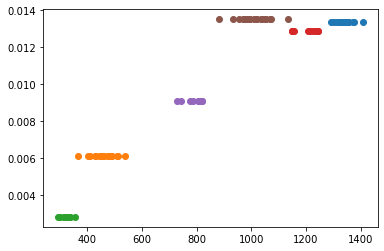

In [42]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot()

X, y = [], []
for grade, ps in cukas.items():
    ax.scatter(ps, [grade] * len(ps))
    for i in range(len(ps)):
        X.append(ps[i])
        y.append(grade)

In [43]:
from sklearn.linear_model import LinearRegression

# initiate linear regression model
model = LinearRegression()

# define predictor and response variables
X = np.array(X)
X = X.reshape(-1, 1)


# fit regression model
model.fit(X, y)

# calculate R-squared of regression model
r_squared = model.score(X, y)

# view R-squared value
print(r_squared)

0.8697582620427391


In [44]:
model.coef_

array([9.68317354e-06])

In [45]:
model.intercept_

0.0016071979198451786

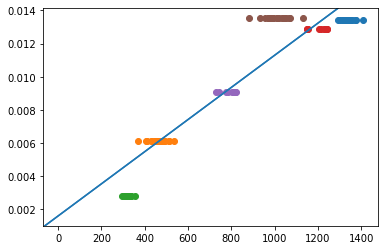

In [47]:
ax.axline((0, model.intercept_), slope=model.coef_[0])
fig

In [48]:
X, y = [], []
for grade, ps in cukas.items():
    X.append(np.mean(ps))
    y.append(grade)

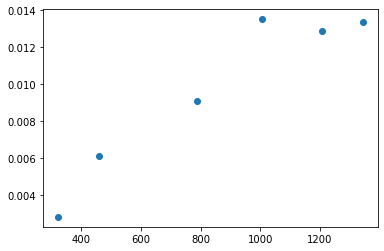

In [49]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X, y)

In [50]:
# initiate linear regression model
model = LinearRegression()

# define predictor and response variables
X = np.array(X)
X = X.reshape(-1, 1)


# fit regression model
model.fit(X, y)

# calculate R-squared of regression model
r_squared = model.score(X, y)

# view R-squared value
print(r_squared)

0.9068015583914618


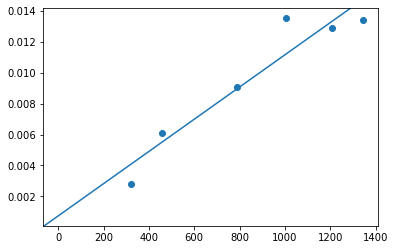

In [51]:
ax.axline((0, model.intercept_), slope=model.coef_[0])
fig